
# Project: No Show Appointments - A study on the Brazilian medical appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This Notebook is trying to answer a couple of questions on the Brazilian Patients behaviour when it comes to the medical appointments they make.

Questions we are trying to answer:
    1. Relation between having a scholarship and showing up to an appointment.
    2. Correlation between neighbourhood and having a scholarship.
    3. Relation between recieving a reminding SMS beforehand and showing up to an appointment.
    4. Average age of patients whom are relatively keen on showing up.
    5. Average age of patients whom are alcoholic.
    6. Correlation between Hypertension and Alcoholism.
    7. Correlation between being Handicapped and showing up to an appointment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline


In [2]:
# Functions
def plot_2bar_graph(data, bar_labels, legend=None):
    plt.bar(np.arange(2), data);
    plt.xticks(np.arange(2), bar_labels);
    plt.ylim(0.0, 1.0);
    if legend is not None:
        plt.legend(legend);

<a id='wrangling'></a>
## Data Wrangling


### General Properties

#### Loading the Data

In [3]:
df = pd.read_csv("data.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Some lookout of the data

In [4]:
before_wrangling = df.shape[0]

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
# Dropping both duplicates and inaccurate entries
index = df[(df["Age"] < 0) | (df["Handcap"] > 1)].index
df.rename(columns={'Hipertension':'Hypertension'}, inplace=True)

In [7]:
df.drop(index, inplace=True)
df.drop_duplicates(inplace=True)
print("Total number of entries dropped = {}".format(before_wrangling - df.shape[0]))
df.head()

Total number of entries dropped = 200


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Making sure our data is sound after all the wrangling

In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.103270e+05,1.103270e+05,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000
mean,1.475245e+14,5.675298e+06,37.070753,0.098281,0.196833,0.071605,0.030382,0.018509,0.321182
std,2.561388e+14,7.129883e+04,23.098052,0.297695,0.397607,0.257834,0.171638,0.134782,0.466932
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.174584e+12,5.640278e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.175389e+13,5.680567e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439381e+13,5.725508e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110327 non-null float64
AppointmentID     110327 non-null int64
Gender            110327 non-null object
ScheduledDay      110327 non-null object
AppointmentDay    110327 non-null object
Age               110327 non-null int64
Neighbourhood     110327 non-null object
Scholarship       110327 non-null int64
Hypertension      110327 non-null int64
Diabetes          110327 non-null int64
Alcoholism        110327 non-null int64
Handcap           110327 non-null int64
SMS_received      110327 non-null int64
No-show           110327 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB



### Data Cleaning

#### Drop down irrelative columns

In [10]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(["PatientId", "AppointmentID", "Gender", "ScheduledDay", "AppointmentDay"], axis=1, inplace=True)
df.head()

,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Communicating Data Wrangling
### Here's what has been done to our data, and why
1. We first checked if there were any unrealistic values, those are either inaccurate or a statistical outliers or just a mere mistake during the data entry process. During this process we found out a couple of flaws:
    * We found out that the header called "Hipertension" is a mispronounciation of "Hypertension" and that has been corrected.
    * We also found out that a boolean column "Handcap" contained a value of 4, which is mistake.
    * Age values were also monitored and dropped the mistakes where values like -1 were removed.
2. Then we went to drop irrelevant data with respect to our analysis:
    * We dropped the following columns as they contributed nothing to our study:
        * PatientId
        * AppointmentID
        * Gender
        * ScheduledDat
        * AppointmentDay
3. We finally made sure that our entries got no null values, by running the info() built-in function.
4. The whole process cost us around 200 entry, which is fine for a dataset this large.


<a id='eda'></a>
## Exploratory Data Analysis


### Relation between having a scholarship and showing up to an appointment
* Showing the impact of being the one responsible for the paycheck or are being paid for on the showing up rate.
The intuition comes from the fact that people tend to be more keen on showing up to appointments they are paying for than those they are not.

In [11]:
# Masks
has_scholarship = df["Scholarship"] == 1
no_scholarship = df["Scholarship"] == 0

showed_up = df["No-show"] == "No"

In [12]:
has_scholarship_show_up = df[has_scholarship & showed_up]
no_scholarship_show_up = df[no_scholarship & showed_up]

Percentage of patients showing up, given that they have scholarships = 76.23%
Percentage of patients showing up, given that they have no scholarships = 80.20%


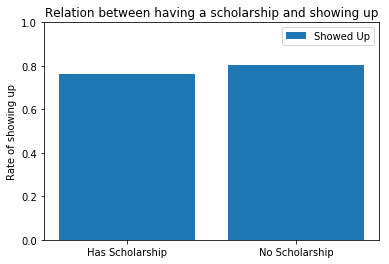

In [13]:
plot_2bar_graph([has_scholarship_show_up.size/df[has_scholarship].size, no_scholarship_show_up.size/df[no_scholarship].size], ["Has Scholarship", "No Scholarship"], legend=["Showed Up"])
plt.ylabel("Rate of showing up");
plt.title("Relation between having a scholarship and showing up");
print("Percentage of patients showing up, given that they have scholarships = {:.2f}%".format((has_scholarship_show_up.size/df[has_scholarship].size)*100))
print("Percentage of patients showing up, given that they have no scholarships = {:.2f}%".format((no_scholarship_show_up.size/df[no_scholarship].size)*100))

We clearly see a small correlation between showing up and having a scholarship, patients with no scholarship tend to be more keen on attending their appointments with around 4% difference between patients with scholarships.

### Correlation between neighbourhood and having a scholarship
* This question is a making of curiosity, checking if there are some neighbourhoods that are more entitled to scholarships than others, in a fair world, a uniform distrubtion would be ideal.

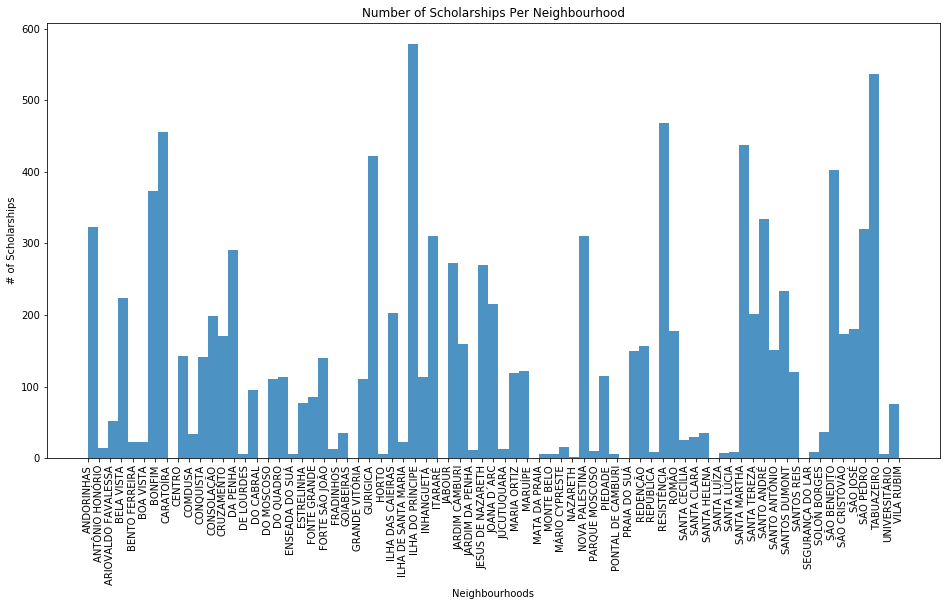

In [14]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
df.Neighbourhood[df.Scholarship == 1].hist(xrot=90, bins=df.Neighbourhood.nunique(), figsize=(16,8), alpha=0.8, grid=False);
plt.xlabel('Neighbourhoods');
plt.ylabel('# of Scholarships');
plt.title("Number of Scholarships Per Neighbourhood");


The histogram shows how different neighbourhoods may be priveleged with recieving a scholarship than other less priveleged neighbourhoods.
* P.S. Not an ideal world

### Relation between recieving a reminding SMS beforehand and showing up to an appointment

* This study could actually help in savings for the company responsible for sending reminders as SMS if shown as inefficient method.

Percentage of patients received an SMS and showed up from all patients that showed up = 29.14%
Percentage of patients that didn't receive an SMS and showed up from all the patients that showed up = 70.86%


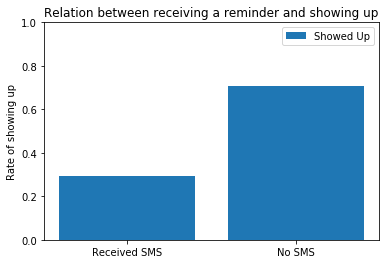

In [15]:
received_sms = df["SMS_received"] == 1
no_sms = df["SMS_received"] == 0
received_sms_and_showed_up = df[received_sms & showed_up]
no_sms_and_showed_up = df[no_sms & showed_up]
plot_2bar_graph([received_sms_and_showed_up.shape[0]/df[showed_up].shape[0], no_sms_and_showed_up.shape[0]/df[showed_up].shape[0]], ["Received SMS", "No SMS"], legend=["Showed Up"])
plt.ylabel("Rate of showing up")
plt.title("Relation between receiving a reminder and showing up")
print("Percentage of patients received an SMS and showed up from all patients that showed up = {:.2f}%".format((received_sms_and_showed_up.shape[0]*100)/df[showed_up].shape[0]))
print("Percentage of patients that didn't receive an SMS and showed up from all the patients that showed up = {:.2f}%".format((no_sms_and_showed_up.shape[0]*100)/df[showed_up].shape[0]))

As shown above, if I was the company responsible for the SMS sending, I would just look for other methods other than SMS reminders.

### Average age of patients whom are relatively keen on showing up

* To find which age is actually keen on showing up.

In [16]:
df[showed_up].Age.mean()

37.77709002941544

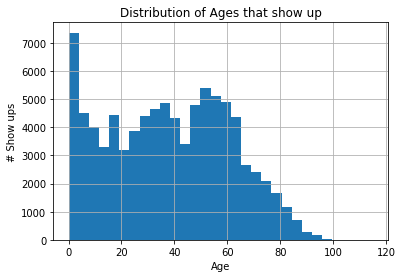

In [17]:
df[showed_up].Age.hist(bins=30);
plt.xlabel("Age");
plt.ylabel("# Show ups");
plt.title("Distribution of Ages that show up");

We can see that the toddlers stands out with their astonishing show-up rate, comes in the second place the 50's ~ 60's Senior citizens.

In [18]:
df[~showed_up].Age.mean()

34.279109435317352

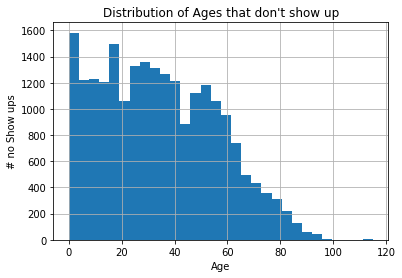

In [19]:
df[~showed_up].Age.hist(bins=30);
plt.xlabel("Age");
plt.ylabel("# no Show ups");
plt.title("Distribution of Ages that don't show up");

Once again toddlers take the first place in not actually showing up, out of all the sample of patients that hadn't show up, it seems that toddlers are taking a large portion of the sample in general.

### Average age of patients whom are alcoholic

Studying the average age of alcoholics in Brazil.

In [20]:
df[df["Alcoholism"] == 1].Age.mean()

49.556384248210023

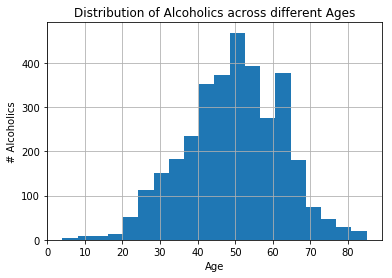

In [21]:
df[df["Alcoholism"] == 1].Age.hist(bins=20);
plt.xlabel("Age");
plt.ylabel("# Alcoholics");
plt.title("Distribution of Alcoholics across different Ages");

A peak at the 50's is noticed, this may or may not be correlated to the previous study on the rate of people showing up to appointments, this will require further analysis to be determined.

### Correlation between Hypertension and Alcoholism

Study to show if a correlation between being Hypertensioned and Alcoholic

In [22]:
print("Percentage of patients with Hypertension and are Alcoholics from all patients with Hypertension = {:.2f}%".format(((df[(df["Hypertension"] == 1) & (df["Alcoholism"] == 1)].shape[0]*100)/df[df["Hypertension"] == 1].shape[0])))

Percentage of patients with Hypertension and are Alcoholics from all patients with Hypertension = 6.09%


This 6.09% may be an indicator of a small correlation between both behaviours, however, I assume a larger sample would be more indicative of such relation.

### Correlation between being Handicapped and showing up to an appointment

In [23]:
handcap_and_no_show_up = df[(df["Handcap"] == 1) & (~showed_up)]
not_handcap_and_no_show_up = df[(df["Handcap"] == 0) & (~showed_up)]
print("Percentage of patients that didn't show up and are handicapped = {:.2f}%".format((handcap_and_no_show_up.shape[0]*100)/df[~showed_up].shape[0]))
print("Percentage of patients that didn't show up and are not handicapped = {:.2f}%".format((not_handcap_and_no_show_up.shape[0]*100)/df[~showed_up].shape[0]))

Percentage of patients that didn't show up and are handicapped = 1.64%
Percentage of patients that didn't show up and are not handicapped = 98.36%


<a id='conclusions'></a>
## Conclusions

### According to our analysis we found out that:
1. An increase in the number of showing ups to appointments in patients with no scholarship that patients with a scholarship, this increase is about 4%.
2. We found out that some neighbourhoods are more priveleged with scholarships than others, and we plotted the  distribution.
3. Strangely we found out that patients who don't receive a reminder are showing up more than those that receive a reminder sms.
4. We found out that the average age of patients that are more probable to show up is around 38 years old.
5. Curiously we explored the average age of those whom are alcoholic and we found out that it is around 50 years old.
6. We also studied the relation between being under hypertension category and being alcoholic and we found out that only 6% of hypertension patients are alcoholic.
7. Finally, we tried to see if handicap could be a reason of not showing up to an appoinment but we found out that only 1.64% of the patients that are handicapped don't show up while the rest are all non-handicapped.

### Limitations
#### Those were mentioned below each relevant part in our study but I am just summerizing them here:
1. During out study of the patients that receive an SMS and not show up numbers, we assumed that the SMS is actually delivered and opened, this is definetly isn't the case for the whole sample, therefore, a more accurate study would be built on a dataset that includes whether the SMS was delivered or not.

2. As per our study on the distribution of ages showing up to their appointments, new born appeared as both the most age that show up but also the most age that doesn't show up, the two relations aren't mutually exclusive so that may happen, but it calls for a further investigation with a larger dataset if we are going to determine something for sure from this study.

3. On the study of the correlation between being hypertensive and alcoholic we found out there's a small portion of the hypertensive patients to be alcoholic, however, as this dataset isn't necessarily focusing on those features, meaning the sample may not accurately represent the population, I would doubt the accuracy of this study.

In [24]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0